<a href="https://colab.research.google.com/github/ulkster/ELVTR---AI-Finance/blob/main/Emre_Ulkucu_Lesson_6_Fraud_Detection_and_Prevention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Coding Assignment #3 - Fraud Detection Models

# Introduction to Fraud Detection Assignment

In this assignment, you will embark on an analytical journey to explore and model a dataset of card transactions with the aim of detecting fraudulent activities. The provided dataset includes various features such as distance from home, transaction details, and purchase patterns, which are essential in understanding the characteristics of fraudulent transactions. You will use Python and key machine learning libraries to analyze this dataset, build a classification model, and evaluate its performance.

## Base Code Provided
- The base code includes necessary Python imports and a decision tree model for initial analysis.
- You will start with a dataset of card transactions, exploring its structure, summary statistics, and event rate.
- The base code will guide you through data loading, preprocessing, model training, and evaluation.
- A visual representation of the decision tree will be created to help understand the model's decision-making process.

## Your Tasks
- **Data Analysis**: Deepen your understanding of the dataset by performing additional exploratory data analysis.
- **Model Building and Evaluation**: Beyond the decision tree, experiment with another model such as Random Forest to compare performance.
- **Performance Metrics**: Evaluate models using metrics like precision, recall, and F1-score, and understand the implications of these metrics in the context of fraud detection.
- **Advanced Techniques** (Extra Credit): Implement data balancing, feature importance analysis, and cross-validation to enhance model performance and robustness.

## Learning Outcomes
- Gain practical experience in handling real-world datasets.
- Develop skills in building and evaluating classification models.
- Learn to interpret model results and make data-driven decisions.
- Explore advanced machine learning techniques (optional extra credit).

## Submission Guidelines
- Submit your enhanced code with clear documentation and comments.
- Include a report or inline comments analyzing your findings and model performances.
- Ensure your code is clean, well-organized, and reproducible.


# Paul's Code


--- First 5 rows of data ---
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0        

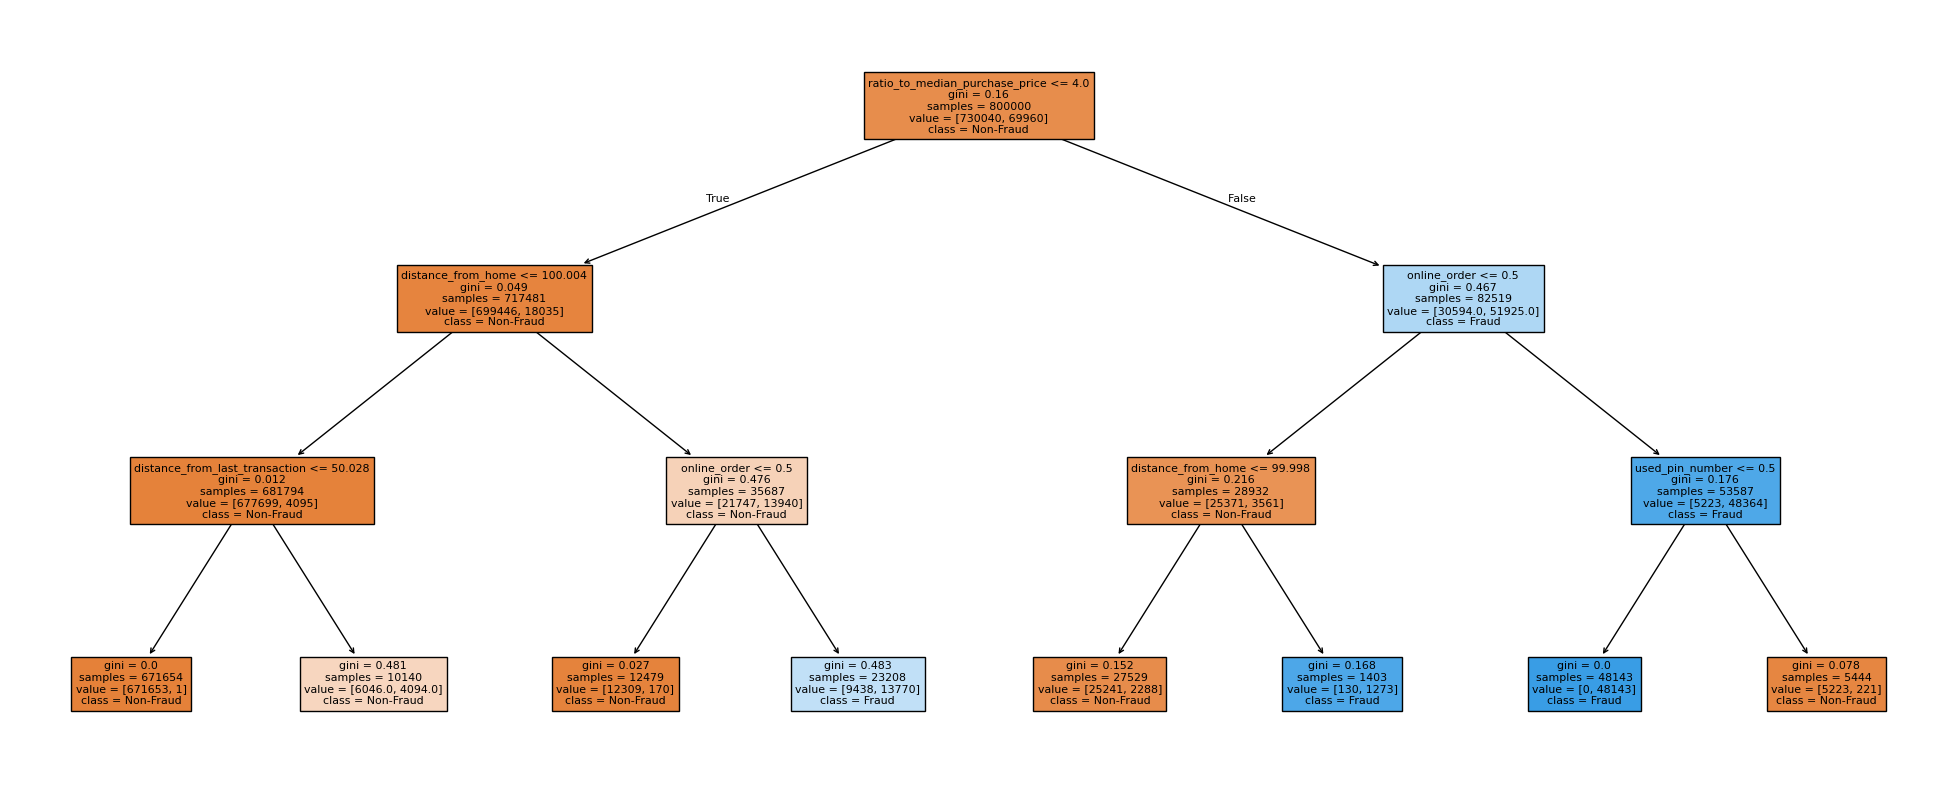

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)

# Print the top 5 rows
print("\n--- First 5 rows of data ---")
print(data.head(5))

# Print summary stats
print("\n--- Summary Statistics ---")
print(data.describe())

# Event rate
print("\n--- Event Rate ---")
event_rate = data['fraud'].mean() * 100
print(f'Event Rate: {event_rate:.2f}%')

# Define the atrributes (X) and the label (y)
X = data.drop('fraud', axis=1)
y = data['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a decision tree classifier
model = DecisionTreeClassifier(max_depth=3) #max_depth is maximum number of levels in the tree

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

# Visualize the decision tree
plt.figure(figsize=(25, 10))
plot_tree(model,
          filled=True,
          feature_names=['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price',
                         'repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'],
          class_names=['Non-Fraud', 'Fraud'])
plt.show()

## Fraud Detection Model Workflow Summary

1. **Import Libraries**
   - `pandas` for data handling.
   - `numpy` for numerical operations.
   - `sklearn` for machine learning tools.
   - `matplotlib` for data visualization.

2. **Load Dataset**
   - Data is loaded from a remote URL using `pandas.read_csv`.

3. **Initial Data Exploration**
   - Initial examination using `data.head()` and `data.tail()` to understand dataset structure.

4. **Data Preparation**
   - Features (`X`) and target variable (`y`) are defined.
   - `fraud` column is the target, while others are features.

5. **Data Splitting**
   - Dataset is split into training and test sets.
   - `train_test_split` is used, with a test size of 20%.

6. **Model Initialization**
   - Decision Tree Classifier initialized with a maximum depth of 3.
   - Limits complexity and overfitting of the model.

7. **Model Training**
   - Model is trained using the training set (`X_train`, `y_train`).

8. **Prediction and Evaluation**
   - Model predictions made on the test set.
   - Evaluation using accuracy, confusion matrix, and classification report.

9. **Visualization**
   - Decision tree visualized using `matplotlib` and `sklearn.tree.plot_tree`.
   - Helps in understanding the decision-making process of the model.

# Commentary
- This code effectively demonstrates the end-to-end process of a machine learning project.
- Decision trees are a good choice for fraud detection due to their interpretability.
- The model is simple yet provides a decent understanding of the basic approach to fraud detection in financial transactions.
- Visualization is a key aspect, especially in complex domains like fraud detection, for understanding the model's decision criteria.

# Model Performance Analysis and Commentary

- **Data Overview**
  - First 5 rows show a mix of numerical features like `distance_from_home`, `distance_from_last_transaction`, etc., crucial for predicting fraud.
  - Summary statistics indicate a varied distribution of values, with some features having a wide range (e.g., `distance_from_home`).

- **Model Accuracy**
  - High accuracy of 98% suggests the model is very effective in classifying transactions as fraudulent or non-fraudulent.

- **Confusion Matrix Analysis**
  - Low number of false positives (2481) and false negatives (1646) compared to true positives and negatives.
  - Indicates a good balance in identifying both fraudulent and non-fraudulent transactions accurately.

- **Classification Report Insights**
  - High precision (0.99) for class 0 (Non-Fraud) and good precision (0.86) for class 1 (Fraud).
  - Recall is also high for both classes, especially for class 1 (0.91), which is critical in fraud detection.
  - F1-scores are robust, indicating a balanced model considering both precision and recall.

- **Overall Evaluation**
  - The decision tree model shows excellent performance in identifying fraud.
  - The balance between precision and recall, especially for fraud detection (class 1), is commendable.
  - High accuracy combined with the detailed metrics suggest a well-tuned model for this dataset.
  - The model could be further improved by exploring feature engineering, trying other algorithms, or tuning hyperparameters.


# Coding Assignment:  Comparative Analysis of Fraud Detection Models

## Objective
Enhance your skills in model evaluation and comparison in a real-world application: fraud detection. Using the provided Decision Tree model and dataset of card transactions, you will build a Random Forest model and compare its performance against the Decision Tree model.

## Tasks
1. **Model Building**:
   - Build a Random Forest model using the provided dataset.
2. **Model Evaluation**:
   - Calculate and interpret the precision and recall for the Random Forest model.
   - Generate and interpret the confusion matrix for the Random Forest model.
3. **Comparative Analysis**:
   - Compare the performance of the Decision Tree and Random Forest models using precision, recall, and confusion matrices.
   - Visualize the comparison using a bar chart.
4. **Reflection and Discussion**:
   - Discuss your findings, comparing the two models. Reflect on model performance, suitability for fraud detection, and potential issues like overfitting.

## Grading Rubric

**Total Points: 100**

1. **Model Building (30 Points)**:
   - Successfully building a Random Forest model: 30 points

2. **Model Evaluation (40 Points)**:
   - Correct calculation of precision and recall for the Random Forest model: 20 points
   - Correct generation and interpretation of the Random Forest confusion matrix: 20 points

3. **Comparative Analysis (20 Points)**:
   - Accurate comparison of model performance (including the provided Decision Tree model): 10 points
   - Clear and correct visualization using a bar chart: 10 points

4. **Reflection and Discussion (10 Points)**:
   - Cohesive and thoughtful discussion comparing the two models: 10 points

## Submission Guidelines
- Submit your work in a Jupyter Notebook or as a Python script with comments explaining your steps. You can also include your discussion in the notebook, as comments in your script, or in a separate text file.
- Ensure your plots and tables are clearly labeled and legible.

## Notes
- Be sure to demonstrate your understanding of the task and the models.


---
## ***ASSIGNMENT CODE***

In [ ]:
# Writing a Bold function for use elsewhere instead of having to type '\033[1m' every time (which is hardly intuitive)
def bold_text(text):
    bold_start = '\033[1m'
    bold_end = '\033[0m'
    return bold_start + text + bold_end

#### Load Libraries & Data File

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load the dataset
url = 'https://raw.githubusercontent.com/marhcouto/fraud-detection/master/data/card_transdata.csv?raw=true'
data = pd.read_csv(url)

#### Sample Data

In [ ]:
data.sample(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
297036,1.492638,1.036209,0.474264,0.0,0.0,0.0,0.0,0.0
443251,12.950027,11.514617,0.602362,1.0,0.0,0.0,1.0,0.0
59568,5.980493,111.605264,1.925772,1.0,0.0,1.0,1.0,0.0
650001,8.280886,4.724120,0.532660,1.0,1.0,0.0,0.0,0.0
556762,10.435932,0.283342,1.288133,1.0,1.0,0.0,0.0,0.0


In [ ]:
data.dtypes

,0
distance_from_home,float64
distance_from_last_transaction,float64
ratio_to_median_purchase_price,float64
repeat_retailer,float64
used_chip,float64
used_pin_number,float64
online_order,float64
fraud,float64


In [ ]:
# prompt: random forest

from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_confusion = confusion_matrix(y_test, rf_y_pred)
rf_classification_rep = classification_report(y_test, rf_y_pred)

In [ ]:
# Separating the Print code so I don't have to wait for the model to rerun every time
print(bold_text("\n--- Random Forest Model Performance Metrics ---\n"))
print(bold_text("Accuracy"), f'{rf_accuracy:.2f} \n')
print(bold_text("Confusion Matrix:"))
print(rf_confusion)
print(bold_text("\nClassification Report:"))
print(rf_classification_rep)
#Now you can compare rf_classification_rep with the classification_rep from the decision tree
#and rf_confusion with confusion.  You can also plot the results.


--- Random Forest Model Performance Metrics ---

Accuracy 1.00 

Confusion Matrix:
[[182557      0]
 [     2  17441]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



**Observations:**

* The *Random Forest* is evidently **perfect** on this data (all scores are 1.00).
  * I suppose this is to be expected since the initial *Decision Tree* had such high scores and the *Random Forest* is building as an *ensemble learner* with multiple trees.
  * Plus, this particular data was probably chosen to show this very result.

* There were actually **two False Negatives** (the '2' in the bottom-left of the confusion matrix), meaning that two entries that were actually fraud were mislabeled as non-fraud.

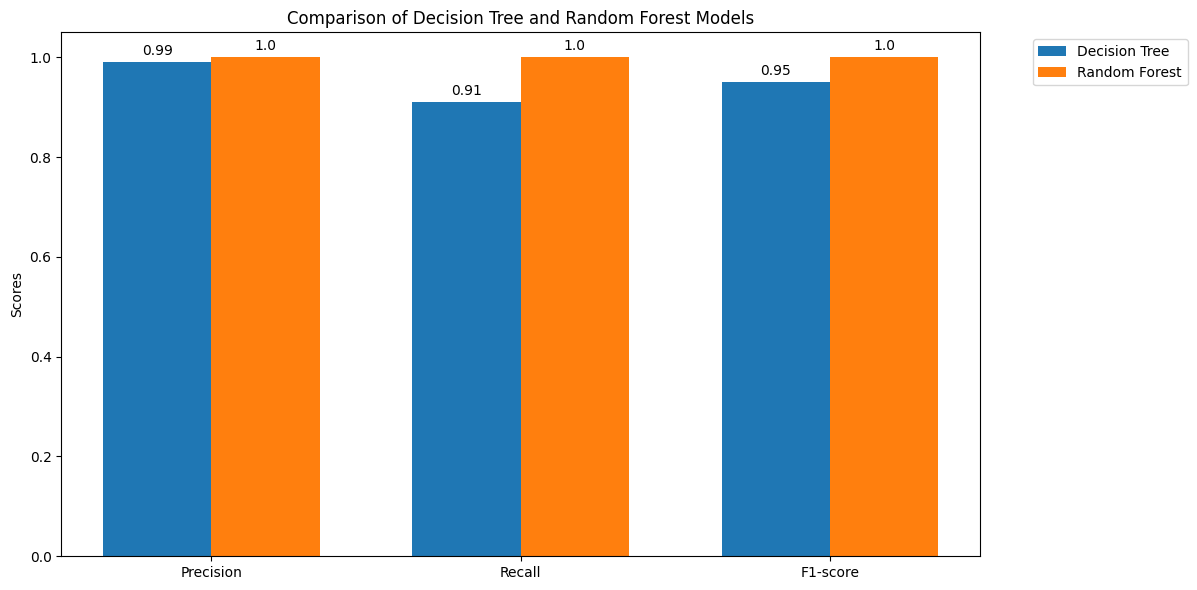

In [ ]:
# prompt: bar chart compare performances with two bars (dt & rf) at each metric (precision, recall and f1)

import matplotlib.pyplot as plt

# Extract precision, recall, and F1-score for both models
dt_precision = 0.99 #replace with actual values from classification_report
dt_recall = 0.91 #replace with actual values from classification_report
dt_f1 = 0.95 #replace with actual values from classification_report
rf_precision = 1.00 #replace with actual values from rf_classification_report
rf_recall = 1.00 #replace with actual values from rf_classification_report
rf_f1 = 1.00 #replace with actual values from rf_classification_report

metrics = ['Precision', 'Recall', 'F1-score']
dt_scores = [dt_precision, dt_recall, dt_f1]
rf_scores = [rf_precision, rf_recall, rf_f1]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, dt_scores, width, label='Decision Tree')
rects2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Decision Tree and Random Forest Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.legend(bbox_to_anchor=(1.05, 1),  # Moves the legend outside the chart
           loc='upper left')          # Even though it's to the right, 'upper left' anchors the top-left...
                                      # ... of the legend box to just outside the chart so that it doesn't go too far
plt.show()

**Observations:**

* In my brief experience, I have yet to hear about **overfitting** with *test* data since I have only seen it as an issue with the *training* data you're using to build and improve your predictor.
  * But I suppose since it is still **in-time**, it could still be a consideration.
  * This could be further analyzed with **out-of-time** data to see if these results hold (unlikely since they are literally a perfect 1.00).

---

# Extra Credit: Advanced Model Enhancement and Evaluation

## Objective
Advance your data science expertise by applying more sophisticated techniques in model enhancement and evaluation within the context of fraud detection. This extra credit section includes data balancing, implementing cross-validation, and conducting a feature importance analysis.

## Tasks
1. **Balancing the Data**:
   - Utilize a technique like SMOTE or undersampling to balance the dataset.
   - Rebuild the Random Forest model using the balanced dataset.
2. **Cross-Validation**:
   - Implement 5-fold cross-validation for the Random Forest model.
   - Analyze the model's performance and stability based on cross-validation results.
3. **Feature Importance Analysis**:
   - Determine feature importance using the Random Forest model.
   - Present the feature importances in a table and a graph.

## Extra Credit Grading Rubric

**Total Points: 50**

1. **Balancing the Data (15 Points)**:
   - Correct application of a technique to balance the dataset: 7 points
   - Successful rebuilding of the Random Forest model with balanced data: 8 points

2. **Cross-Validation (20 Points)**:
   - Proper implementation of 5-fold cross-validation: 10 points
   - Comprehensive analysis of cross-validation results: 10 points

3. **Feature Importance Analysis (15 Points)**:
   - Accurate determination of feature importances: 7 points
   - Clear and informative presentation of feature importances in a table and graph: 8 points

## Submission Guidelines for Extra Credit
- Include your extra credit work in the same Jupyter Notebook or Python script as the main assignment.
- Clearly label the sections and outputs for the extra credit tasks.
- Ensure your analysis and visualizations are comprehensible and well-explained.

## Notes
- This extra credit section is optional and designed for students interested in deeper exploration of data science techniques.
- Focus on the quality of analysis and clarity of presentation for awarding points in this section.


---
### **EXTRA CREDIT CODE**

#### 1. Balancing the Data (SMOTE)

In [ ]:
# prompt: smote

from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize and train a new Random Forest model with the resampled data
rf_model_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_resampled.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate the model
rf_y_pred_resampled = rf_model_resampled.predict(X_test)
rf_accuracy_resampled = accuracy_score(y_test, rf_y_pred_resampled)
rf_confusion_resampled = confusion_matrix(y_test, rf_y_pred_resampled)
rf_classification_rep_resampled = classification_report(y_test, rf_y_pred_resampled)

In [ ]:
print(bold_text("\n--- Random Forest Model Performance Metrics (Resampled Data) ---\n"))
print(bold_text("Accuracy"), f'{rf_accuracy_resampled:.2f} \n')
print(bold_text("Confusion Matrix:"))
print(rf_confusion_resampled)
print(bold_text("\nClassification Report:"))
print(rf_classification_rep_resampled)


--- Random Forest Model Performance Metrics (Resampled Data) ---

Accuracy 1.00 

Confusion Matrix:
[[182556      1]
 [     2  17441]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



**Observations:**

* Interesting that using *synthetic minority over-sampling (SMOTE)* -- which **adds** entries to the **minority** section (i.e. the **fraud** cases) -- actually just added a single result to the **false positives** (upper-right of the confusion matrix).

* Also, since *SMOTE* adds data, I was expecting the above results to have overall higher counts; *however*, the oversampling adds data to the **training** & the matrix/report metrix show results for the **test** data (which is untouched).  Hence, the totals are the same as before.

In [ ]:
print("Original Training Data Shape:", X_train.shape, y_train.shape)
print("Resampled Training Data Shape:", X_train_resampled.shape, y_train_resampled.shape)

Original Training Data Shape: (800000, 7) (800000,)
Resampled Training Data Shape: (1460080, 7) (1460080,)


**Observations:**

* Here, you can see that the *resampled* shapes have increased from 800,000 (80% of 2,000,000) to 1,460,080 (an increase of ~660k or ~83%).
  * There are seven features in the *'X_train'*.

* And for specifically the shape of the *'y_train'* (and its resampled version), there is no number after the comma since it is one-dimensional & the '1' is implied with no value present.

In [ ]:
from collections import Counter

print("Original Training Data Class Distribution:", Counter(y_train))
print("Resampled Training Data Class Distribution:", Counter(y_train_resampled))


Original Training Data Class Distribution: Counter({0.0: 730040, 1.0: 69960})
Resampled Training Data Class Distribution: Counter({0.0: 730040, 1.0: 730040})


**Observations:**

* We went from having **69,960 fraud cases** in the original *training set* to **730,040** in the *resampled* (which matches the amount of **non-fraud**).

#### 2. Cross-Validation

In [ ]:
# prompt: 5 fold cv on rf

from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds for cross-validation
n_folds = 5

# Initialize KFold cross-validator
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model_resampled, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print(f"\n--- Cross-Validation Scores (Accuracy) ---\n{cv_scores}")
print(f"\n--- Average Cross-Validation Accuracy ---\n{np.mean(cv_scores):.4f}")

# Analyze the model's performance and stability based on cross-validation results
print(f"\n--- Cross-Validation Standard Deviation ---\n{np.std(cv_scores):.4f}")


--- Cross-Validation Scores (Accuracy) ---
[0.9999726  0.9999863  0.99999658 0.99997603 0.99997603]

--- Average Cross-Validation Accuracy ---
1.0000

--- Cross-Validation Standard Deviation ---
0.0000


**Observations:**

* Again, since we started out with near-perfect accuracy and quickly maxed out to 100%, there's not much room for improvement.
  * Similarly, since the accuracy already reached 100%, the **standard deviation** is at **0.0000** since there's **no variance** in the **predicted vs. actual** results.

* Also, since this is running the previous **random forest** model (which took **4 min** itself) five different times with different samplings of the data for *train/test*, it is unsurprising that this **cross-validation** took **16 min.**
  * In this particular case where even the original **decision tree** model was already close to 100% accurate and executed in a matter of seconds, implementing either **RF** or **CV** was certainly ***not worth*** the extra processing power/time that went into the multiple minutes.
  * With another data set that started with far lower performance results, there would be more room for possible improvement to better compare different models' metrics.

* The first list of score metrics shows results that all reached 0.9999 and only differ at the fifth decimal place (hundred thousandths).
  * It so happens that the **third fold** technically performed **best** (0.99999658), and it might be of note that the final two folds had the same results (0.99997603).
  * Since all five results of each folds grouping were **within a couple hundred thousandths**, I would say that the CV was **very stable**.

#### 3. Feature Importance Analysis


--- Feature Importance Table ---
                          Feature  Importance
2  ratio_to_median_purchase_price    0.530556
0              distance_from_home    0.197009
6                    online_order    0.124611
1  distance_from_last_transaction    0.071582
5                 used_pin_number    0.034659
4                       used_chip    0.032170
3                 repeat_retailer    0.009413


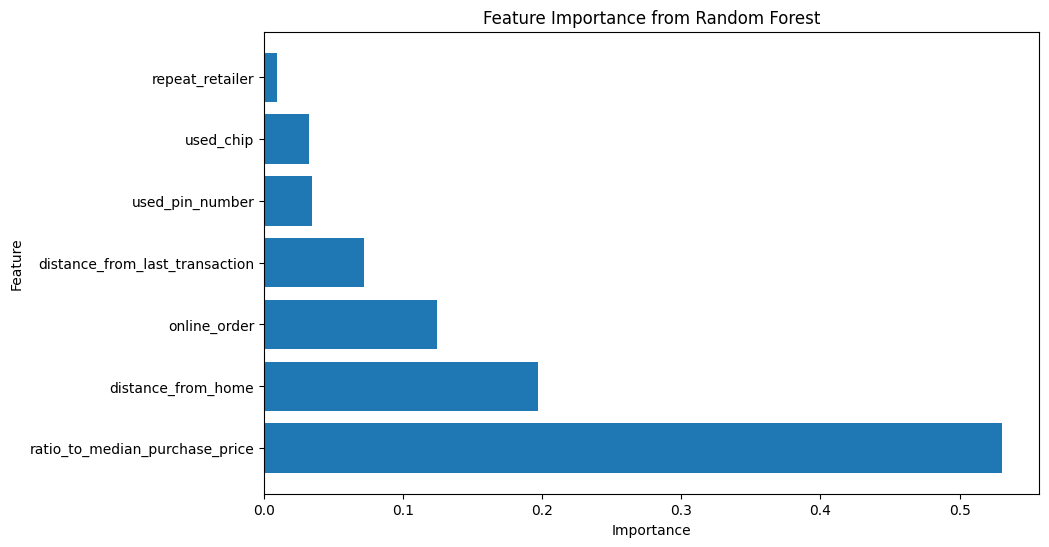

In [ ]:
# prompt: feature importance

# Get feature importances from the trained Random Forest model
feature_importances = rf_model_resampled.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances in a table
print("\n--- Feature Importance Table ---")
print(feature_importance_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

**Observations:**

1. *Ranking* - The list is **descending** order, with *'ratio_to_median_purchase_price'* being the **most important** feature and the *'repeat_retailer'* being the **least important** feature.
  * The first column that starts with 2, 0, 6, etc. is just the index of each feature (ex: *'distance_from_home'* was listed first in the original dataset & *'online_order'* was last).

2. For the actual *importance scores* - those values represent how much each feature correlates to the **predictiveness** of the model (ex: *'used_chip'* contributes about **3.2%** of the model's predictive ability).

3. It makes sense that how a single purchase compares to the "typical" purchase behavior of a client has a significant effect to probability of fraud (ex: if I usually buy a 4-for-\$4 at Wendy's, then there's suddenly a \$1,000 dinner at a Michelin-star restuarant... fishy).  However, I was surprised at how much importance this had since:
  * A) online ordering makes big ticket purchases more common IMO (ex: buying a TV or furniture is way more expensive than a daily coffee).  But I guess these would even out with more of them for *median* and a purchase with an even higher ratio would be more likely fraudulent (ex: a '64 Aston Martin ~$1 mill).
  * B) I expected *'distance_from_last_transaction'* to result in higher importance.  I live in San Diego, so it would be quite suspicious if there was suddenly a purchase in Bangladesh.  However, online ordering does tend to broaden the range where you're buying things... especially if you're buying straight from China like on temu.

4. I think an interesting feature that could help in this context might be something along the lines of "ratio of price at same retailer" since I've read that fraudsters tend to try a small purchase, wait to see if it goes through uncontested, then spring for a huge purchase at the same vendor.  For instance, if I get my oil changed at the dealer for ~$100 one day then suddenly buy a brand new Bugati (assume it's a special dealer) for 1000x that, I think the combination of *ratio* and *distance* together could really be a useful metric to try and track.